In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [34]:
#Basic Information
df = pd.read_csv('healthcare-dataset-stroke-data.csv.xls')

In [36]:
#Handling missing values
df['bmi'].fillna(df['bmi'].median())

0       36.6
1       28.1
2       32.5
3       34.4
4       24.0
        ... 
5105    28.1
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

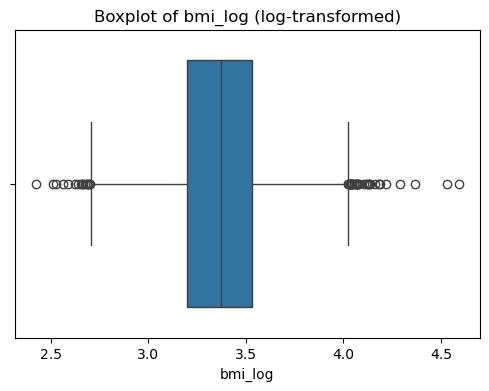

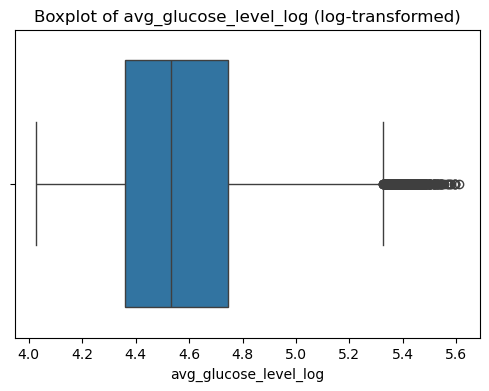

In [38]:
#Log transformation to handle skewness 
df['bmi_log'] = np.log1p(df['bmi'])
df['avg_glucose_level_log'] = np.log1p(df['avg_glucose_level'])

for col in ['bmi_log', 'avg_glucose_level_log']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, data=df)
    plt.title(f"Boxplot of {col} (log-transformed)")
    plt.show()

In [40]:
#Encode categorical variables 
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']
df_encoded = pd.get_dummies(df.drop('id', axis = 1), drop_first = True)

In [24]:
df_encoded = pd.get_dummies(df.drop('id', axis=1), drop_first=True)
print("\nEncoded columns:", df_encoded.columns)


Encoded columns: Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'bmi_log', 'avg_glucose_level_log', 'gender_Male',
       'gender_Other', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')


In [42]:
#Random Forest Model: doing a baseline model as a starting point
#Based on results: highly imbalanced, (-5% stroke cases)- biased towards majority (stroke = No)
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [44]:
def train_evaluate_rf(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(random_state = 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()
    return model

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



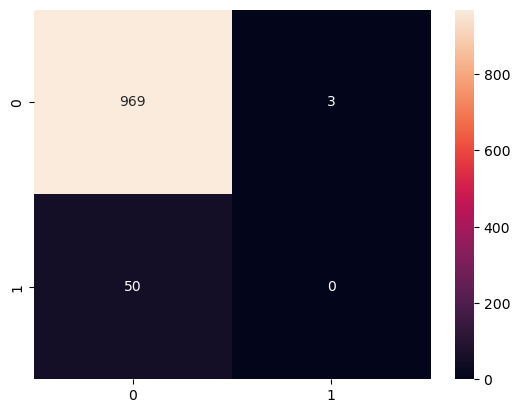

In [46]:
rf_model = train_evaluate_rf(X_train, y_train, X_test, y_test)